# **GIAI ĐOẠN 2: TIỀN XỬ LÝ VÀ KHÁM PHÁ DỮ LIỆU**
---

## <p style="text-align: center;">**Phần 1 - Nạp các thư viện cần thiết** <a name="answer-the-question"></a></p> 

Bước 1

In [139]:
import sys  
sys.path.insert(0, '../phase_1_data_collection')

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.data_collection import df_titles_raw

Bước 2

In [142]:
num_duplicate_data = df_titles_raw.duplicated().sum()
num_duplicate_data

35

day la markdown

In [205]:
df_titles = df_titles_raw.drop_duplicates()
df_titles.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


day la markdown

In [144]:
num_rows, num_cols = df_titles.shape
num_rows, num_cols

(18980, 15)

day la markdown

In [203]:
columns = df_titles.columns
columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score',
       'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

day la markdown

In [146]:
dtypes = df_titles.dtypes
dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

day la markdown

In [147]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18980 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    18980 non-null  object 
 1   title                 18979 non-null  object 
 2   type                  18980 non-null  object 
 3   description           18831 non-null  object 
 4   release_year          18980 non-null  int64  
 5   age_certification     8684 non-null   object 
 6   runtime               18980 non-null  int64  
 7   genres                18980 non-null  object 
 8   production_countries  18980 non-null  object 
 9   seasons               4208 non-null   float64
 10  imdb_id               17586 non-null  object 
 11  imdb_score            17107 non-null  float64
 12  imdb_votes            17070 non-null  float64
 13  tmdb_popularity       18310 non-null  float64
 14  tmdb_score            16324 non-null  float64
dtypes: float64(5), int64

day la markdown (lý do drop description)

In [170]:
df_titles.drop('description', inplace=True, axis=1, errors='ignore')

/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_1229/1106842911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titles.drop('description', inplace=True, axis=1, errors='ignore')


day la markdown

In [189]:
null_columns = df_titles.isnull().sum()
null_columns

id                          0
title                       1
type                        0
release_year                0
age_certification       10296
runtime                     0
genres                      0
production_countries        0
seasons                     0
imdb_id                  1394
imdb_score               1873
imdb_votes               1910
tmdb_popularity           670
tmdb_score               2656
dtype: int64

day la markdown

In [180]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

day la markdown

In [207]:
df_titles[null_columns[null_columns.values > 0].keys()].drop(['title', 'age_certification', 'imdb_id'], axis=1) \
                                                        .agg([missing_ratio, min, max]).round(2)

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
missing_ratio,9.87,10.06,3.53,13.99
min,1.10,5.00,0.00,0.50
max,9.90,2555504.00,4447.89,10.00


day la markdown

In [211]:
def num_diff_vals(c):
    return c.nunique(dropna=True)

def diff_vals(c):
    return c.dropna().unique()

In [212]:
df_titles[['type', 'age_certification']].agg([missing_ratio, num_diff_vals, diff_vals]).round(2)

,type,age_certification
missing_ratio,0.0,54.246575
num_diff_vals,2,11
diff_vals,"[SHOW, MOVIE]","[TV-PG, PG, G, PG-13, R, TV-G, TV-Y, TV-14, NC..."


1. Title

day la markdown

In [151]:
df_titles['title'].value_counts()

A Nightmare on Elm Street             4
The Gift                              4
The Outsider                          4
Shadows                               4
Dostana                               4
                                     ..
Dismissed                             1
Human Flow                            1
Warriors of Liberty City              1
Scales: Mermaids Are Real             1
Mighty Little Bheem: Kite Festival    1
Name: title, Length: 18357, dtype: int64

day la markdown

In [215]:
df_titles['title'].nunique()

18357

2. Type

In [152]:
df_titles['type'].value_counts()

MOVIE    14772
SHOW      4208
Name: type, dtype: int64

day la markdown

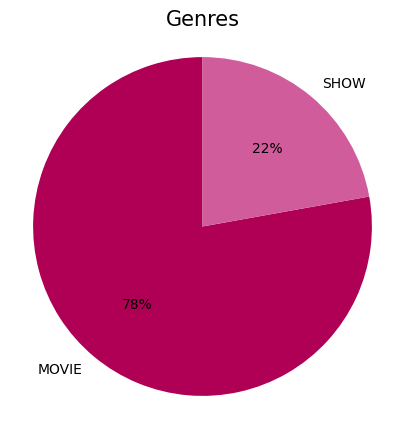

In [284]:
# plot pie chart
plt.figure(figsize=(8, 5))
plt.title('Genres', fontsize=15)
plt.pie(df_titles['type'].value_counts(), 
        labels=df_titles['type'].value_counts().keys(),
        textprops={"fontsize":10},
        radius=1.1, startangle=90,
        colors=['#af0055', '#D05C9C'],
        autopct='%.0f%%')
plt.show()

3. Release year

In [251]:
num_of_movies_by_year = df_titles['release_year'].value_counts().sort_index()
num_of_movies_by_year

1901       1
1902       2
1903       1
1904       1
1906       2
        ... 
2018    1597
2019    1837
2020    1767
2021    1901
2022     522
Name: release_year, Length: 116, dtype: int64

day la markdown

<AxesSubplot: >

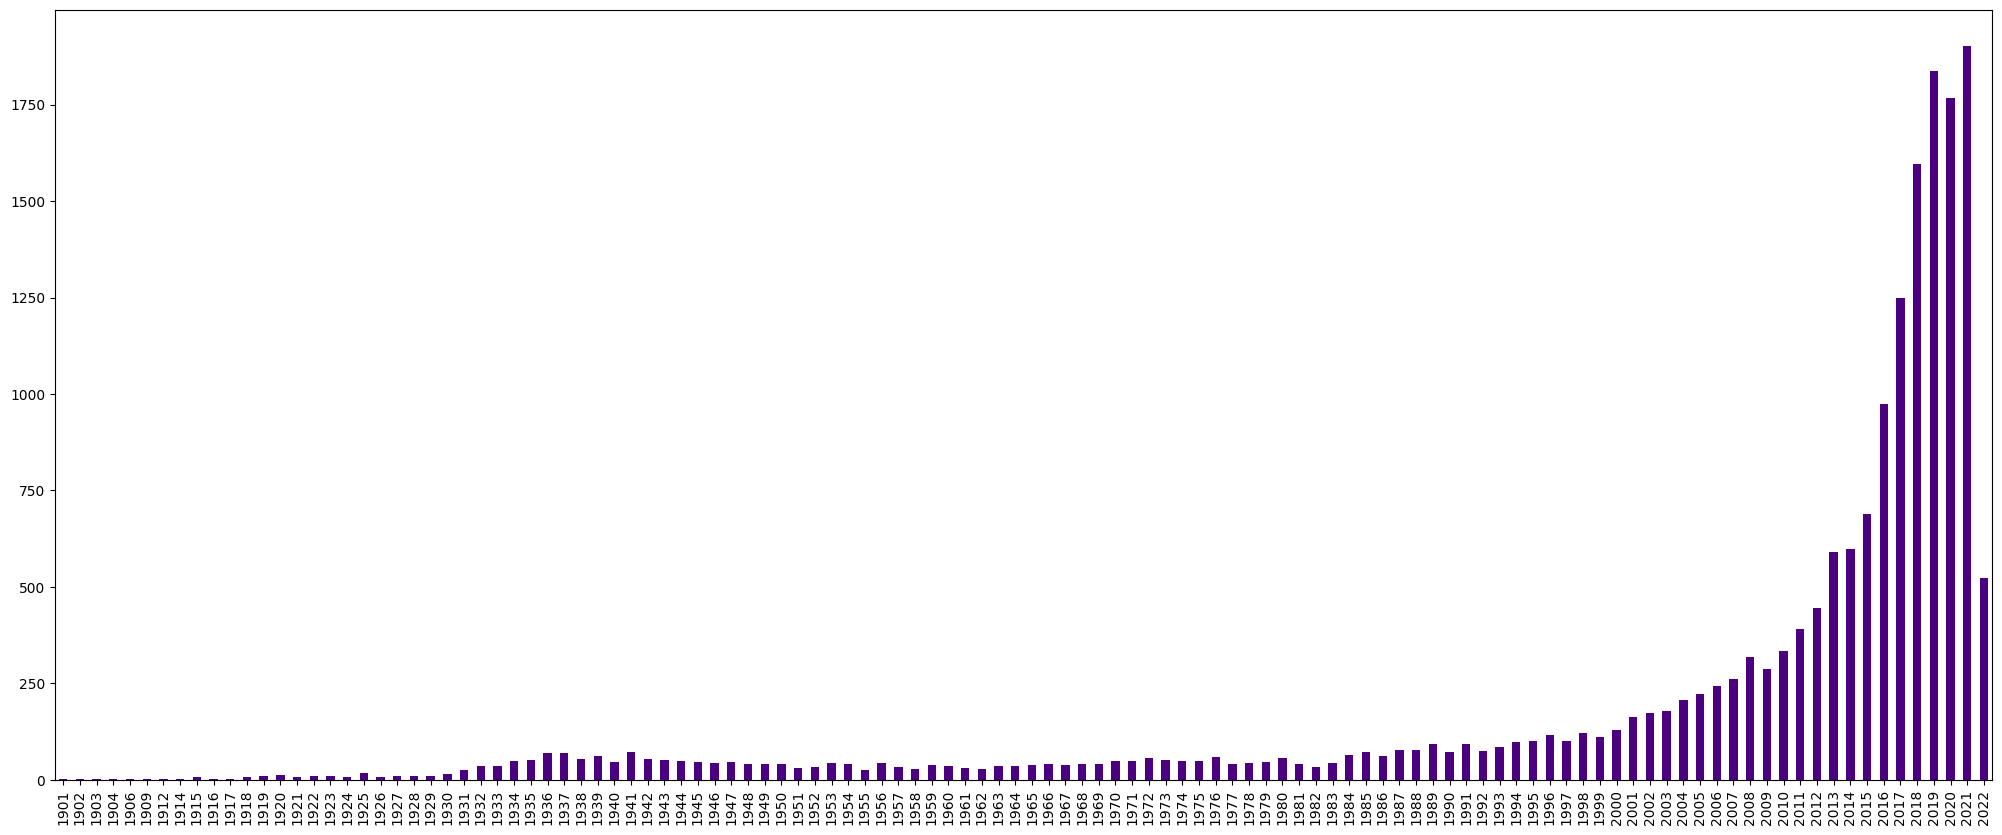

In [256]:
# plot barchart
num_of_movies_by_year.plot.bar(figsize=(25, 10), color='indigo')

4. Age certification

In [285]:
df_titles['age_certification'].fillna('NONE', inplace=True)
df_titles['age_certification'].value_counts()

/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_1229/1336027304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titles['age_certification'].fillna('NONE', inplace=True)


NONE     10296
R         2400
PG-13     1508
TV-MA     1411
PG        1122
TV-14      804
G          475
TV-PG      360
TV-Y7      213
TV-Y       200
TV-G       156
NC-17       35
Name: age_certification, dtype: int64

day la markdown

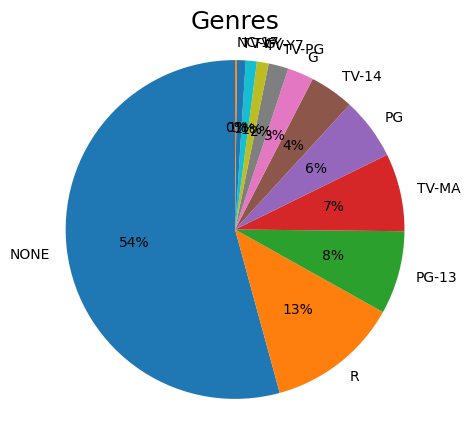

In [286]:
# pie chart
plt.figure(figsize=(8, 5))
plt.title('Genres', fontsize=18)
plt.pie(df_titles['age_certification'].value_counts(), 
        labels=df_titles['age_certification'].value_counts().keys(),
        textprops={"fontsize":10},
        radius=1.1, startangle=90,
        autopct='%.0f%%')
plt.show()

5. Production countries

In [156]:
df_titles['production_countries'] = df_titles['production_countries'].str.replace('[', '').str.replace("'", '').str.replace(']', '')

/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_1229/1326365560.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_titles['production_countries'] = df_titles['production_countries'].str.replace('[', '').str.replace("'", '').str.replace(']', '')
/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_1229/1326365560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titles['production_countries'] = df_titles['production_countries'].str.replace('[', '').str.replace("'", '').str.replace(']', '')


In [157]:
top_production_countries = df_titles['production_countries'].str.split(', ').explode().value_counts().drop('').nlargest(n=10)
num_production_countries = df_titles['production_countries'].str.split(',').str.len()
main_production_countries = df_titles['production_countries'].str.split(',').str[0]

In [158]:
main_production_countries.unique().__len__(), main_production_countries[main_production_countries == ''].__len__()

(126, 1160)

6. Genres

In [159]:
df_titles['genres'] = df_titles['genres'].str.replace('[', '').str.replace("'", '').str.replace(']', '')

/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_1229/1429193037.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_titles['genres'] = df_titles['genres'].str.replace('[', '').str.replace("'", '').str.replace(']', '')
/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_1229/1429193037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titles['genres'] = df_titles['genres'].str.replace('[', '').str.replace("'", '').str.replace(']', '')


In [160]:
top_genres = df_titles['genres'].str.split(', ').explode().value_counts().drop('').nlargest(n=10)
num_genres = df_titles['genres'].str.split(', ').str.len()
main_genres = df_titles['genres'].str.split(', ').str[0]

In [161]:
main_genres.unique().__len__(), main_genres[main_genres == ''].__len__()

(20, 321)

7. Seasons

In [162]:
df_titles['seasons'] = df_titles['seasons'].fillna(0)

/var/folders/m7/368g6v5d01g4x7brwcqrgvg40000gn/T/ipykernel_1229/3793712578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_titles['seasons'] = df_titles['seasons'].fillna(0)


day la markdown

In [163]:
df_titles.isnull().sum()

id                          0
title                       1
type                        0
release_year                0
age_certification       10296
runtime                     0
genres                      0
production_countries        0
seasons                     0
imdb_id                  1394
imdb_score               1873
imdb_votes               1910
tmdb_popularity           670
tmdb_score               2656
dtype: int64

day la markdown

In [164]:
df_titles.set_index('title')

,id,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
title,,,,,,,,,,,,,
The Three Stooges,ts20945,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6
The General,tm19248,MOVIE,1926,NaN,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0
The Best Years of Our Lives,tm82253,MOVIE,1946,NaN,171,"romance, war, drama",US,0.0,tt0036868,8.1,63026.0,8.435,7.8
His Girl Friday,tm83884,MOVIE,1940,NaN,92,"comedy, drama, romance",US,0.0,tt0032599,7.8,57835.0,11.270,7.4
In a Lonely Place,tm56584,MOVIE,1950,NaN,94,"thriller, drama, romance",US,0.0,tt0042593,7.9,30924.0,8.273,7.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fine Wine,tm1014599,MOVIE,2021,NaN,100,"romance, drama",NG,0.0,tt13857480,6.8,45.0,1.466,NaN
C/O Kaadhal,tm898842,MOVIE,2021,NaN,134,drama,,0.0,tt11803618,7.7,348.0,NaN,NaN
Lokillo,tm1059008,MOVIE,2021,NaN,90,comedy,CO,0.0,tt14585902,3.8,68.0,26.005,6.3


In [165]:
df_titles.dtypes

id                       object
title                    object
type                     object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

In [166]:
dummies = pd.get_dummies(df_titles[['type']])
dummies

,type_MOVIE,type_SHOW
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
5845,1,0
5846,1,0
5847,1,0
5848,1,0
